1.引入必要的包。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
from sklearn.cluster import KMeans

2.加载图像并可视化。

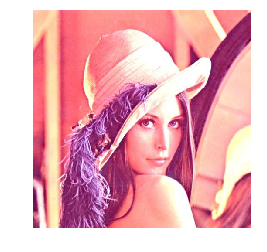

In [5]:
img = io.imread('https://github.com/qikunlun/ML-course/raw/master/data/lena.jpg')
height,width,channel = img.shape
plt.figure(figsize=(4, 4*width/height))
plt.imshow(img)
plt.axis('off')
plt.show()

3.图像转为$N\times 3$维的矩阵（$N=width\times height$)，对图像像素值进行标准化并进行聚类。

In [6]:
img_data = img.reshape((-1, channel))
img_data = img_data / 256.0
print(img_data.shape)

(250000, 3)


4.采用不同聚类个数对像素值进行K-Means聚类，并进行可视化。

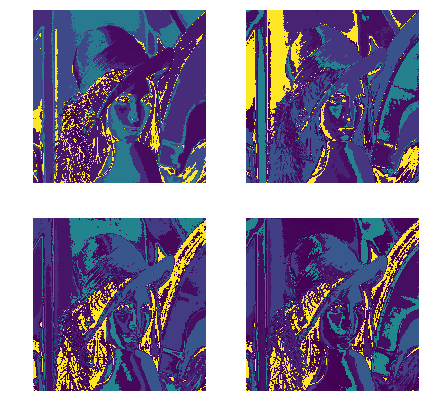

In [9]:
n_clusters = [7,9,11,13]
fig, ax = plt.subplots(2, 2, figsize=(7, 7*width/height))
for i,nc in enumerate(n_clusters):
    kmeans = KMeans(n_clusters=nc).fit(img_data)
    img_label = kmeans.labels_.reshape([height, width])
    ax[int(i/2),int(i%2)].imshow(256.0 / (img_label+1),)
    ax[int(i/2),int(i%2)].axis('off')
plt.show()

5.采用K-means对遥感影像进行聚类分析的示例。

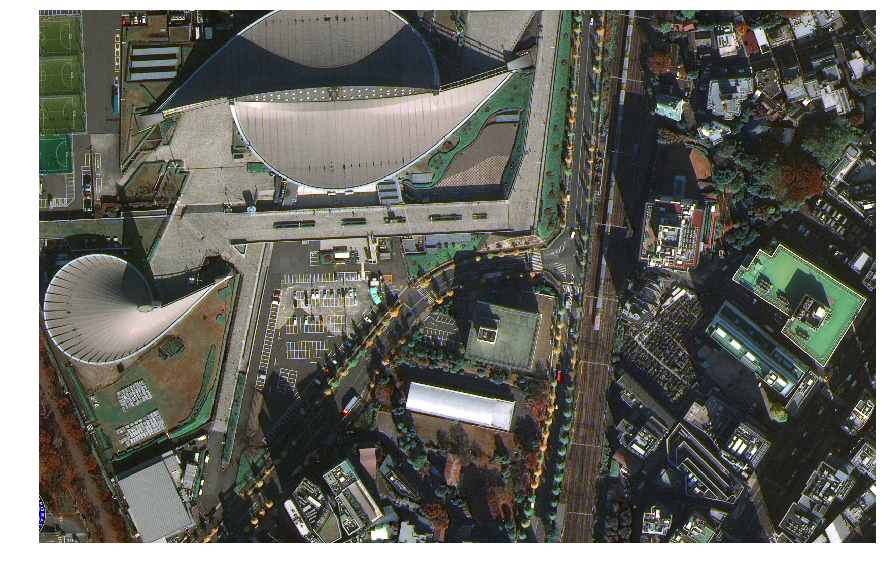

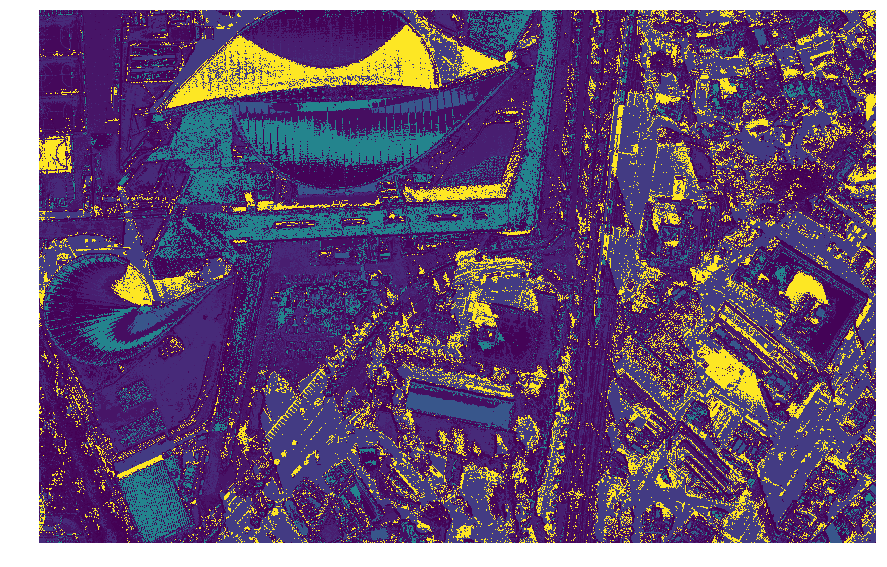

In [10]:
img = io.imread('https://github.com/qikunlun/ML-course/raw/ \
    master/data/WorldView-4-Satellite-Image-30cm-Gymnasium-Tokyo.jpg')
height,width,channel = img.shape
plt.figure(figsize=(15, 15*width/height))
plt.imshow(img)
plt.axis('off')
plt.show()

img_data = img.reshape((-1, channel))
img_data = img_data / 256.0

kmeans = KMeans(n_clusters=11).fit(img_data)
img_label = kmeans.labels_.reshape([height, width])

plt.figure(figsize=(15, 15*width/height))
plt.imshow(256.0 / (img_label+1),)
plt.axis('off')
plt.savefig('./data/rs-segment-result.jpg')
plt.show()